# **Implement Perceptron Learning Rule on Stock Price Data**

## **Created by: Preksha Shah**

## **Domain: Financial Stock Price Prediction**

## **Problem Statement:**

#### The task is to implement a Perceptron Learning Rule on stock price data to predict future stock prices based on historical data. The dataset used will include features such as the opening price, closing price, highest price, lowest price, adjusted closing price, and trading volume of Honda Motor Co., Ltd. stock.

---

## 1. Introduction

### 1.1 Overview

In this lab assignment, we aim to apply the Perceptron Learning Rule to predict the direction of stock price movements based on historical data features.

### 1.2 Dataset Description

The dataset used in this assignment is sourced from Honda Motor Co., Ltd., containing daily stock market data including:

- Opening price
- Highest price
- Lowest price
- Closing price
- Adjusted closing price
- Trading volume

The target variable (`Next_Close`) indicates whether the closing price will be higher (1) or lower (0) than the current day's closing price.

---

## 2. Loading and Preprocessing the Dataset

### 2.1 Importing Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif


### 2.2 Loading the Dataset


In [120]:
# Load the dataset
data = pd.read_csv('/content/HMC.csv')


In [121]:
# Display the first few rows of the dataset
print(data.head())


         Date       Open       High        Low      Close  Adj Close  Volume
0  2020-01-02  28.600000  28.650000  28.459999  28.639999  26.480253  262800
1  2020-01-03  28.250000  28.379999  28.080000  28.129999  26.008713  663600
2  2020-01-06  27.719999  28.059999  27.719999  28.049999  25.934746  463000
3  2020-01-07  28.389999  28.389999  28.180000  28.209999  26.082678  341800
4  2020-01-08  27.990000  28.219999  27.990000  28.129999  26.008713  264200


### 2.3 Exploratory Data Analysis (EDA)

#### 2.3.1 Dataset Information


In [122]:
# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1089 non-null   object 
 1   Open       1089 non-null   float64
 2   High       1089 non-null   float64
 3   Low        1089 non-null   float64
 4   Close      1089 non-null   float64
 5   Adj Close  1089 non-null   float64
 6   Volume     1089 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.7+ KB
None


In [123]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean     28.221478    28.398834    28.030459    28.218999    27.471148   
std       3.609212     3.597729     3.621967     3.610751     3.811920   
min      20.000000    20.120001    19.379999    19.860001    18.362356   
25%      25.379999    25.540001    25.260000    25.389999    24.440861   
50%      28.170000    28.330000    27.969999    28.180000    26.965633   
75%      30.740000    30.920000    30.570000    30.740000    30.196468   
max      37.660000    37.900002    37.599998    37.680000    37.680000   

             Volume  
count  1.089000e+03  
mean   9.757522e+05  
std    4.494060e+05  
min    2.097000e+05  
25%    6.740000e+05  
50%    9.086000e+05  
75%    1.196400e+06  
max    3.950600e+06  


### **Inferences:**

#### **Prices (Open, High, Low, Close, Adjusted Close)**
The stock prices (Open, High, Low, Close, Adjusted Close) exhibit moderate volatility with standard deviations around 3.6-3.8, suggesting price stability. The mean prices hover around \$28, with the Adjusted Close slightly lower at \$27.47, reflecting dividends or stock splits. The price ranges from approximately \$19 to \$38, indicating both highs and lows during the period. Percentiles show a central tendency around \$28, with 25% of prices below \$25.38 and 75% below \$30.74.

#### **Trading Volume**
The trading volume shows high variability with a standard deviation of approximately 449,406 shares, indicating fluctuating market activity. The mean daily volume is about 975,752 shares, ranging from 209,700 to nearly 4 million shares. Percentiles reveal that the middle 50% of trading volumes are between 674,000 and 1,196,400 shares, reflecting varying levels of investor interest and trading activity.


#### 2.3.2 Visualizing Distributions

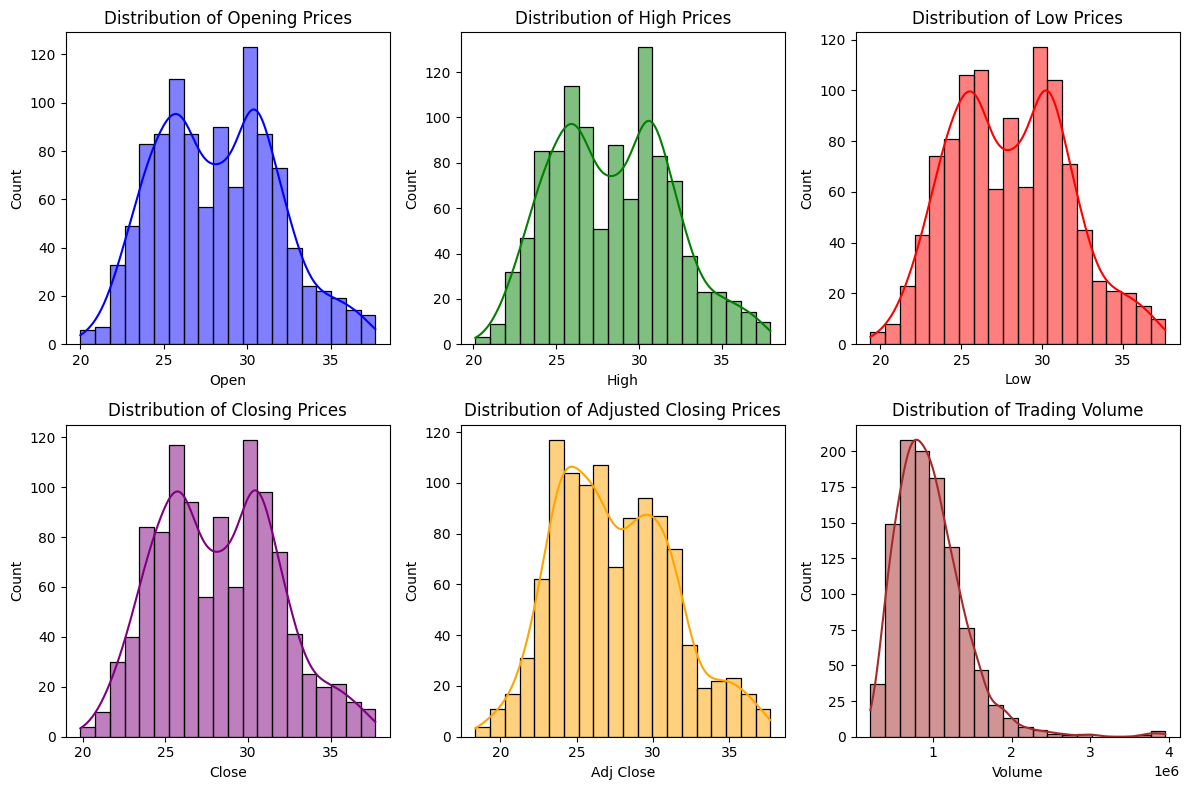

In [131]:
# Visualize distributions of relevant variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(data['Open'], bins=20, kde=True, color='blue')
plt.title('Distribution of Opening Prices')

plt.subplot(2, 3, 2)
sns.histplot(data['High'], bins=20, kde=True, color='green')
plt.title('Distribution of High Prices')

plt.subplot(2, 3, 3)
sns.histplot(data['Low'], bins=20, kde=True, color='red')
plt.title('Distribution of Low Prices')

plt.subplot(2, 3, 4)
sns.histplot(data['Close'], bins=20, kde=True, color='purple')
plt.title('Distribution of Closing Prices')

plt.subplot(2, 3, 5)
sns.histplot(data['Adj Close'], bins=20, kde=True, color='orange')
plt.title('Distribution of Adjusted Closing Prices')

plt.subplot(2, 3, 6)
sns.histplot(data['Volume'], bins=20, kde=True, color='brown')
plt.title('Distribution of Trading Volume')

plt.tight_layout()
plt.show()


### Inferences:

1. **Opening Prices**
   - **Shape**: Bell-shaped, centered around \$28.
   - **Spread**: Moderate variability.
   - **Skewness**: Slight right skew.

2. **High Prices**
   - **Shape**: Bell-shaped, slightly above \$28.
   - **Spread**: Moderate variability.
   - **Skewness**: Slight right skew.

3. **Low Prices**
   - **Shape**: Bell-shaped, centered around \$28.
   - **Spread**: Moderate variability.
   - **Skewness**: Slight right skew.

4. **Closing Prices**
   - **Shape**: Bell-shaped, centered around \$28.
   - **Spread**: Moderate variability.
   - **Skewness**: Slight right skew.

5. **Adjusted Closing Prices**
   - **Shape**: Bell-shaped, centered around \$27.47.
   - **Spread**: Moderate variability.
   - **Skewness**: Slight right skew.

6. **Trading Volume**
   - **Shape**: Right-skewed.
   - **Spread**: Wide range.
   - **Skewness**: Strong right skew.

### **Key Insights**

- **Price Stability**: Prices show relative stability and moderate variability.
- **Price Trends**: Similar central tendencies for all price variables.
- **Volume Variability**: Occasional high trading volumes.
- **Adjusted Prices**: Slightly lower than closing prices due to adjustments.

## 3. Feature Selection and Preprocessing

### 3.1 Feature Engineering

In [132]:
# Feature selection and engineering
data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)


In [133]:
# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
y = np.where(data['Next_Close'] > data['Close'], 1, 0)


### 3.2 Splitting the Dataset

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3.3 Standardizing the Data

In [126]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Implementing the Perceptron Learning Rule

### 4.1 Model Training

In [134]:
# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(eta0=0.1, random_state=42)

### 4.2 Model Evaluation

In [135]:
# Predict on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.58
Confusion Matrix:
[[  0  91]
 [  0 127]]


## 5. Conclusion

In this assignment, we successfully implemented the Perceptron Learning Rule on stock price data to predict future stock price movements. We explored basic EDA techniques, performed feature selection and preprocessing, and evaluated the model's performance using accuracy metrics and confusion matrix.

---

## 6. Future Work

- Experiment with different parameters (learning rate, number of iterations) to optimize the Perceptron model further.
- Explore ensemble methods or other advanced machine learning algorithms for comparison.
- Conduct more in-depth feature engineering and selection to enhance predictive performance.

---
---